In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import r2_score
import numpy as np
from sklearn.model_selection import validation_curve
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score

import xgboost as xgb
from sklearn.metrics import mean_squared_error
from xgboost import XGBRegressor


In [3]:
df = pd.read_csv(r"D:\POI data\merged_data\727_3737_add_tenure_garden.csv")

df_encoded = pd.get_dummies(df, columns=['property_type', 'borough','tenure'])

X = df_encoded.drop(['price', 'address', 
        'lat', 'lon', 'Price_per_square_meter', 'id'], axis=1)
y = df_encoded['Price_per_square_meter']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [4]:
def testResult(xgb_model):
    # 预测训练集和测试集
    y_train_pred = xgb_model.predict(X_train)
    y_test_pred = xgb_model.predict(X_test)

    # 计算均方根误差（RMSE）作为性能指标
    train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
    test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))

    print(f"Train RMSE: {train_rmse}")
    print(f"Test RMSE: {test_rmse}")


    # 计算训练集和测试集的R²值
    train_r2 = r2_score(y_train, y_train_pred)
    test_r2 = r2_score(y_test, y_test_pred)

    print(f"Train R²: {train_r2}")
    print(f"Test R²: {test_r2}")
    #print(f"params: { xgb_model.get_params()}")

    # 计算训练集和测试集的MAPE值
    train_mape = np.mean(np.abs((y_train - y_train_pred) / y_train)) * 100
    test_mape = np.mean(np.abs((y_test - y_test_pred) / y_test)) * 100

    print(f"Train MAPE: {train_mape:.2f}%")
    print(f"Test MAPE: {test_mape:.2f}%")

In [5]:
# 创建XGBoost回归模型
xgb_model = XGBRegressor(random_state=42)

# 训练模型
xgb_model.fit(X_train, y_train)
testResult(xgb_model)

Train RMSE: 676.4654062745021
Test RMSE: 2950.7819711627344
Train R²: 0.9849524177145454
Test R²: 0.7070695655750775
Train MAPE: 6.08%
Test MAPE: 19.47%


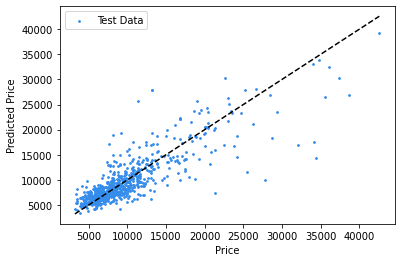

In [6]:

# 获取模型在测试集上的预测值
y_test_pred = xgb_model.predict(X_test)

# 绘制测试集的散点图，设置颜色为蓝色，大小为10
plt.scatter(y_test.to_numpy(), y_test_pred, color='#358CEA', s=3, label='Test Data')

# 绘制对角线，表示完美预测的线
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()],
         color='black', linestyle='--')

# 设置图例和标签
plt.xlabel('Price')
plt.ylabel('Predicted Price')
plt.legend()

# 显示图形
plt.show()



In [7]:

def importance_all(xgb_model):
    # 获取特征重要性
    feature_importance = xgb_model.feature_importances_

    # 将特征重要性和特征名称对应起来，并按重要性值降序排序
    feature_importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importance})
    feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)


    # 只保留前15个特征
    top_15_features = feature_importance_df.head(15)

    # 绘制横向柱状图
    plt.figure(figsize=(10, 8))
    plt.barh(top_15_features['Feature'], top_15_features['Importance'], color='skyblue')
    plt.xlabel('Feature Importance')
    plt.ylabel('Feature')
    plt.title('Top 15 XGBoost Feature Importance')
    plt.show()



In [8]:
def draw_feature_ACCimportance(xgb_model):
    feature_importance = xgb_model.feature_importances_
    # 将特征重要性和特征名称对应起来，并按重要性值降序排序
    feature_importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importance})
    feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

    # 筛选特征名以"15m"结尾的特征
    feature_importance_df = feature_importance_df[feature_importance_df['Feature'].str.endswith('15m')]

    # 只保留前15个特征
    top_15_features = feature_importance_df.head(15)

    # 绘制横向柱状图
    plt.figure(figsize=(10, 8))
    plt.barh(top_15_features['Feature'], top_15_features['Importance'], color='skyblue')
    plt.xlabel('Feature Importance')
    plt.ylabel('Feature')
    plt.title('Top 15 XGBoost Feature Importance')
    plt.show()
 

In [9]:

def Categorized_feature_ACCImportance(xgb_model):
    feature_importance = xgb_model.feature_importances_
    # 将特征重要性和特征名称对应起来，并按重要性值降序排序
    feature_importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importance})
    feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

    # 筛选特征名以"15m"结尾的特征
    feature_importance_df = feature_importance_df[feature_importance_df['Feature'].str.endswith('15m')]


    # 绘制横向柱状图
    plt.figure(figsize=(10, 8))
    plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='skyblue')
    plt.xlabel('Feature Importance')
    plt.ylabel('Feature')
    plt.title('Categorized XGBoost Feature Importance')
    plt.show()
    return feature_importance_df

改 Categorized_feature_ACCImportance(xgb_model)函数的代码实现把feature的柱状图中的不同特征类的柱子用不同的颜色，分为6类，具体包含的特征变量已给出。请用好看一点的颜色组表示6中类型，并标注出每个颜色代表什么类型。
education: EducationAccess15m

health: HealthAccess15m

natural: Green parkAccess15m, Bodies of waterAccess15m

commercial: Manufacturing and productionAccess15m

cultural: CultureAccess15m, TourismAccess15m

ser­vice: 上面涉及到的之外的所有。

In [10]:

def get_feature_type(feature):
    # 定义特征类别
    education_features = ['EducationAccess15m']
    health_features = ['HealthAccess15m']
    natural_features = ['Green parkAccess15m', 'Bodies of waterAccess15m']
    commercial_features = ['Manufacturing and productionAccess15m']
    cultural_features = ['CultureAccess15m', 'TourismAccess15m']

    # 判断特征所属类别
    if feature in education_features:
        return 'education'
    elif feature in health_features:
        return 'health'
    elif feature in natural_features:
        return 'natural'
    elif feature in commercial_features:
        return 'commercial'
    elif feature in cultural_features:
        return 'cultural'
    else:
        return 'service'

type_colors = {
        'education': '#8D3BD6',   
        'health': '#0D71DD',          
        'natural': '#06AC4A',         
        'commercial': '#D38714',   
        'cultural': '#D81C19',       
        'service': '#F36CA6'           
    }

def Categorized_feature_ACCImportance(xgb_model):
    feature_importance = xgb_model.feature_importances_
    # 将特征重要性和特征名称对应起来，并按重要性值降序排序
    feature_importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importance})
    feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

    # 筛选特征名以"15m"结尾的特征
    feature_importance_df = feature_importance_df[feature_importance_df['Feature'].str.endswith('15m')]

    # 创建类型及其对应颜色的字典
    

    # 获取颜色列表
    colors = [type_colors[get_feature_type(feature)] for feature in feature_importance_df['Feature']]

    # 绘制横向柱状图
    plt.figure(figsize=(10, 8))
    ax = sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette=colors)
    plt.xlabel('Feature Importance')
    plt.ylabel('Feature')
    plt.title('Categorized XGBoost Feature Importance')

    # 添加图例
    for feature_type, color in type_colors.items():
        plt.bar(0, 0, color=color, label=feature_type, linewidth=0)
    plt.legend()

    # 设置x轴范围从0开始，包含所有特征重要性的值
    plt.xlim(0, max(feature_importance_df['Importance']) * 1.1)

    # 在每个柱子的右侧标明重要性的数值
    for index, value in enumerate(feature_importance_df['Importance']):
        plt.text(value + 0.003, index, f'{value:.4f}', ha='left', va='center', fontsize=10)

    # 逆序排列柱状图，并让y轴从大到小排列
    ax.invert_yaxis()

    # 添加浅灰色的格纹横线和竖线
    plt.grid(color='lightgrey', linestyle='--', linewidth=0.5)

    plt.show()


#  让这些变量的柱子的数值为百分比
def Categorized_feature_relative_ACCImportance(xgb_model):
    feature_importance = xgb_model.feature_importances_
    # 将特征重要性和特征名称对应起来，并按重要性值降序排序
    feature_importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importance})
    feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

    # 筛选特征名以"15m"结尾的特征
    feature_importance_df = feature_importance_df[feature_importance_df['Feature'].str.endswith('15m')]

    # 创建类型及其对应颜色的字典
   

    # 获取颜色列表
    colors = [type_colors[get_feature_type(feature)] for feature in feature_importance_df['Feature']]

    # 将特征重要性的值转换为百分比，并根据最大值来进行相对标尺
    max_importance = feature_importance_df['Importance'].max()
    feature_importance_df['Importance(%)'] = feature_importance_df['Importance'] / max_importance * 100

    # 绘制横向柱状图
    plt.figure(figsize=(10, 8))
    ax = sns.barplot(x='Importance(%)', y='Feature', data=feature_importance_df, palette=colors)
    plt.xlabel('Feature Importance (%)')
    plt.ylabel('Feature')
    plt.title('Categorized XGBoost Feature Importance')

    # 添加图例
    for feature_type, color in type_colors.items():
        plt.bar(0, 0, color=color, label=feature_type, linewidth=0)
    plt.legend()

    # 在柱子右侧标明importance的数值
    for index, value in enumerate(feature_importance_df['Importance(%)']):
        plt.text(value, index, f'{value:.2f}%', ha='left', va='center', fontsize=10)

    # 设置x轴刻度为0%, 25%, 75%, 100%
    plt.xticks([0, 25, 75, 100], ['0%', '25%', '75%', '100%'])

    # 逆序排列柱状图，并让y轴从大到小排列
    ax.invert_yaxis()

    # 添加浅灰色的格纹横线和竖线
    plt.grid(color='lightgrey', linestyle='--', linewidth=0.5)
  
    plt.show()

In [11]:

def Categorized_feature_ACCImportance2(xgb_model):
    feature_importance = xgb_model.feature_importances_
    # 将特征重要性和特征名称对应起来，并按重要性值降序排序
    feature_importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importance})
    feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

    # 筛选特征名以"15m"结尾的特征
    feature_importance_df = feature_importance_df[feature_importance_df['Feature'].str.endswith('15m')]

    # 创建类型及其对应颜色的字典
    

    # 获取颜色列表
    colors = [type_colors[get_feature_type(feature)] for feature in feature_importance_df['Feature']]

    # 绘制横向柱状图
    plt.figure(figsize=(10, 8))
    ax = sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette=colors)
    plt.xlabel('Feature Importance')
    plt.ylabel('Feature')
    plt.title('Categorized XGBoost Feature Importance')

    # 添加图例
    for feature_type, color in type_colors.items():
        plt.bar(0, 0, color=color, label=feature_type, linewidth=0)
    plt.legend()

    # 设置x轴范围从0开始，包含所有特征重要性的值
    plt.xlim(0, max(feature_importance_df['Importance']) * 1.1)

    # 在每个柱子的右侧标明重要性的数值
    for index, value in enumerate(feature_importance_df['Importance']):
        plt.text(value + 0.003, index, f'{value:.4f}', ha='left', va='center', fontsize=10)

    # 逆序排列柱状图，并让y轴从大到小排列
    ax.invert_yaxis()

    # 添加浅灰色的格纹横线和竖线
    plt.grid(color='lightgrey', linestyle='--', linewidth=0.5)
    # 设置y轴刻度文本颜色为柱子的颜色
    for tick_label, color in zip(ax.get_yticklabels(), colors):
        tick_label.set_color(color)

    plt.show()
def Categorized_feature_relative_ACCImportance2(xgb_model):
    feature_importance = xgb_model.feature_importances_
    # 将特征重要性和特征名称对应起来，并按重要性值降序排序
    feature_importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importance})
    feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

    # 筛选特征名以"15m"结尾的特征
    feature_importance_df = feature_importance_df[feature_importance_df['Feature'].str.endswith('15m')]

    # 创建类型及其对应颜色的字典


    # 获取颜色列表
    colors = [type_colors[get_feature_type(feature)] for feature in feature_importance_df['Feature']]

    # 将特征重要性的值转换为百分比，并根据最大值来进行相对标尺
    max_importance = feature_importance_df['Importance'].max()
    feature_importance_df['Importance(%)'] = feature_importance_df['Importance'] / max_importance * 100

    # 绘制横向柱状图
    plt.figure(figsize=(10, 8))
    ax = sns.barplot(x='Importance(%)', y='Feature', data=feature_importance_df, palette=colors)
    plt.xlabel('Feature Importance (%)')
    plt.ylabel('Feature')
    plt.title('Categorized XGBoost Feature Importance')

    # 添加图例
    for feature_type, color in type_colors.items():
        plt.bar(0, 0, color=color, label=feature_type, linewidth=0)
    plt.legend()

    # 在柱子右侧标明importance的数值，并设置y轴刻度的文本颜色为柱子的颜色
    for index, value in enumerate(feature_importance_df['Importance(%)']):
        plt.text(value, index, f'{value:.2f}%', ha='left', va='center')

    # 设置x轴刻度为0%, 25%, 75%, 100%
    plt.xticks([0, 25, 75, 100], ['0%', '25%', '75%', '100%'])

    # 逆序排列柱状图，并让y轴从大到小排列
    ax.invert_yaxis()

    # 添加浅灰色的格纹横线和竖线
    plt.grid(color='lightgrey', linestyle='--', linewidth=0.5)

    # 设置y轴刻度文本颜色为柱子的颜色
    for tick_label, color in zip(ax.get_yticklabels(), colors):
        tick_label.set_color(color)

    plt.show()

In [12]:
def pred_vs_true(xgb_model):
    y_test_pred = xgb_model.predict(X_test)

    # 绘制测试集的散点图，设置颜色为蓝色，大小为10
    plt.scatter(y_test.to_numpy(), y_test_pred, color='#358CEA', s=3, label='Test Data')

    # 绘制对角线，表示完美预测的线
    plt.plot([y_test.min(), y_test.max()],
            [y_test.min(), y_test.max()],
            color='black', linestyle='--')

    plt.xlabel('Price')
    plt.ylabel('Predicted Price')
    plt.title('Scatter Plot Real vs Predicted.')
    plt.legend()
    plt.show()

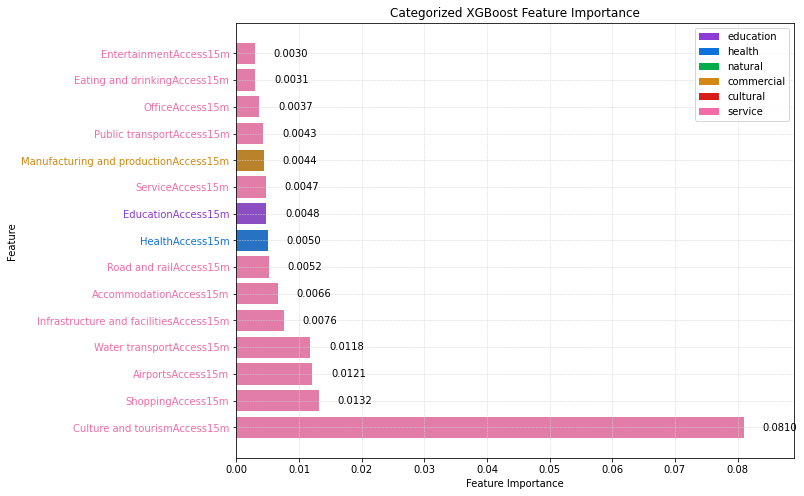

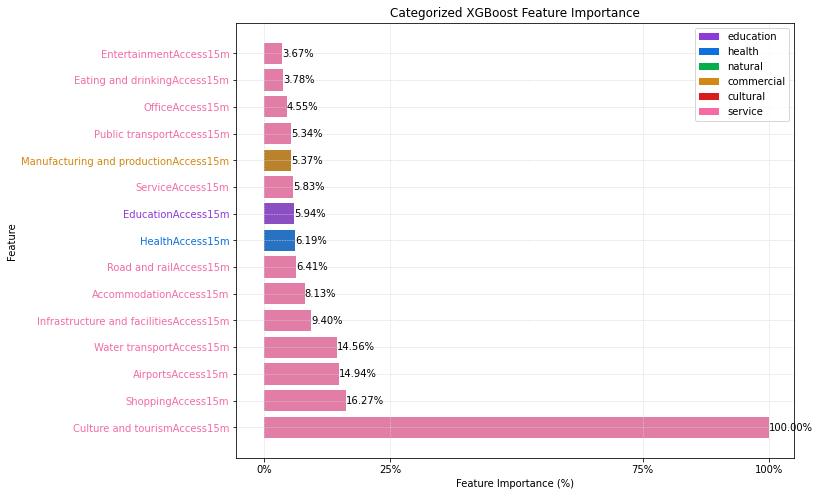

In [13]:
# 获取特征重要性
Categorized_feature_ACCImportance2(xgb_model)
Categorized_feature_relative_ACCImportance2(xgb_model)


---

add_tenure_garden

Train RMSE: 727.9518944009518
Test RMSE: 3038.129561171405
Train R²: 0.9825746743238036
Test R²: 0.6894705215483233
Train MAPE: 6.63%
Test MAPE: 18.98%


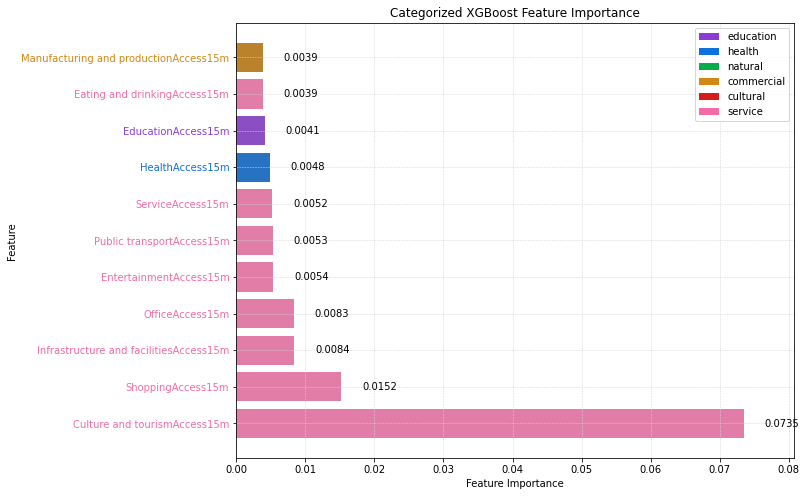

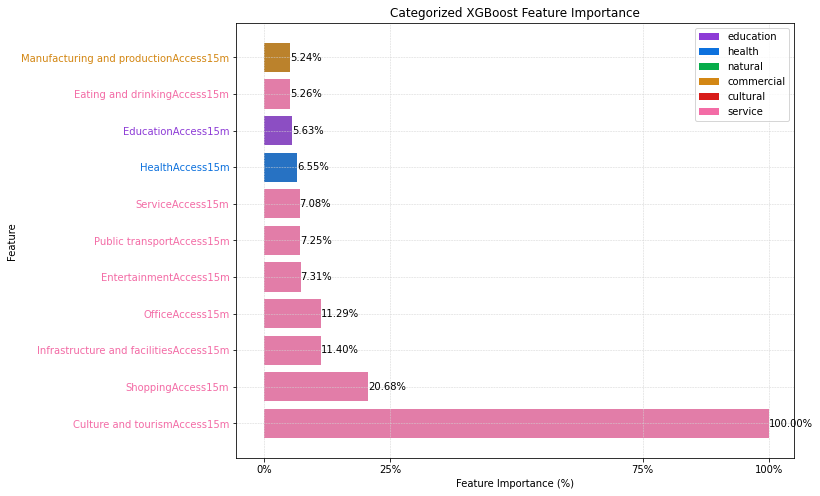

In [14]:
df = pd.read_csv(r"D:\POI data\merged_data\727_3737_add_tenure_garden.csv")
df['Public transportAccess15m'] =  df['Public transportAccess15m'] + df['Water transportAccess15m']+df['AirportsAccess15m']
df = df.drop(columns=['Water transportAccess15m','AirportsAccess15m','Road and railAccess15m','AccommodationAccess15m'])

df_encoded = pd.get_dummies(df, columns=['property_type', 'borough','tenure'])

X = df_encoded.drop(['price', 'address', 
        'lat', 'lon', 'Price_per_square_meter', 'id'], axis=1)
y = df_encoded['Price_per_square_meter']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# 创建XGBoost回归模型
xgb_model = XGBRegressor(random_state=42)

# 训练模型
xgb_model.fit(X_train, y_train)
testResult(xgb_model)
Categorized_feature_ACCImportance2(xgb_model)
Categorized_feature_relative_ACCImportance2(xgb_model)

---

17个类

Train RMSE: 647.8343368409458
Test RMSE: 2996.6187154265635
Train R²: 0.9861992252189445
Test R²: 0.6978982589340212
Train MAPE: 5.81%
Test MAPE: 18.96%


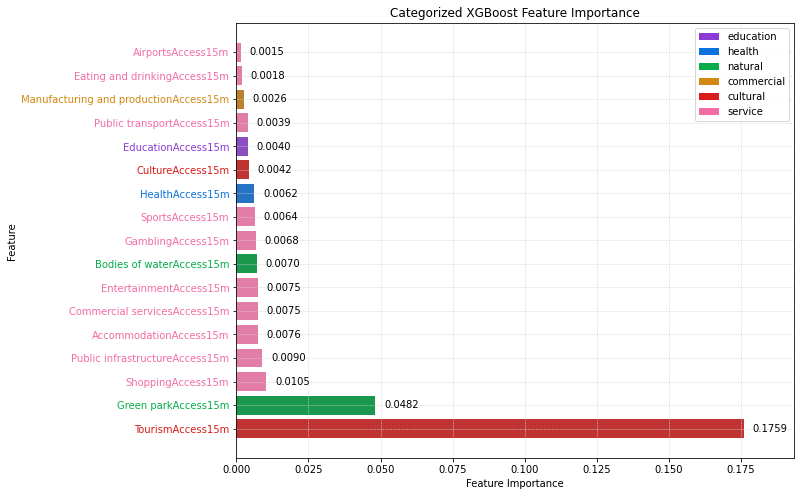

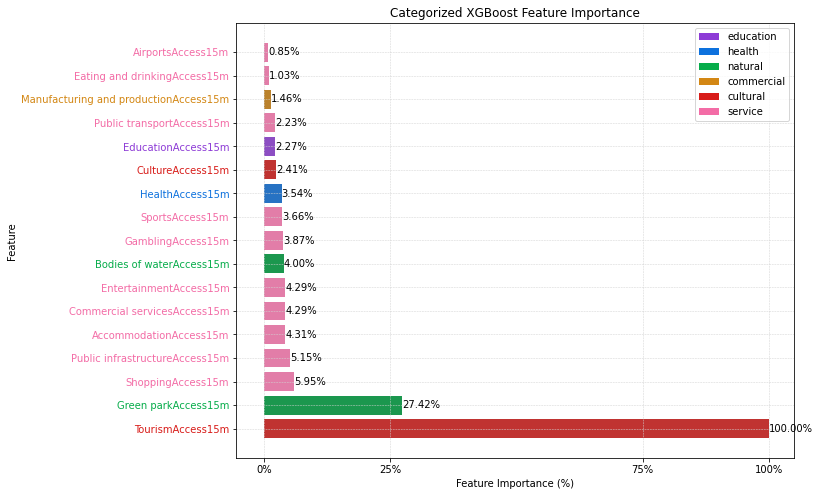

In [15]:
df = pd.read_csv(r"D:\POI data\728_7acc\housing_hasId_reclass2_acc.csv")

df_encoded = pd.get_dummies(df, columns=['property_type', 'borough','tenure'])

X = df_encoded.drop(['price', 'address', 
        'lat', 'lon', 'Price_per_square_meter', 'id'], axis=1)
y = df_encoded['Price_per_square_meter']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# 创建XGBoost回归模型
xgb_model = XGBRegressor(random_state=42)

# 训练模型
xgb_model.fit(X_train, y_train)
testResult(xgb_model)
Categorized_feature_ACCImportance2(xgb_model)
Categorized_feature_relative_ACCImportance2(xgb_model)

---

reclass3

Train RMSE: 655.444930904225
Test RMSE: 2965.4073314316843
Train R²: 0.985873064551438
Test R²: 0.7041585878125454
Train MAPE: 5.76%
Test MAPE: 18.57%


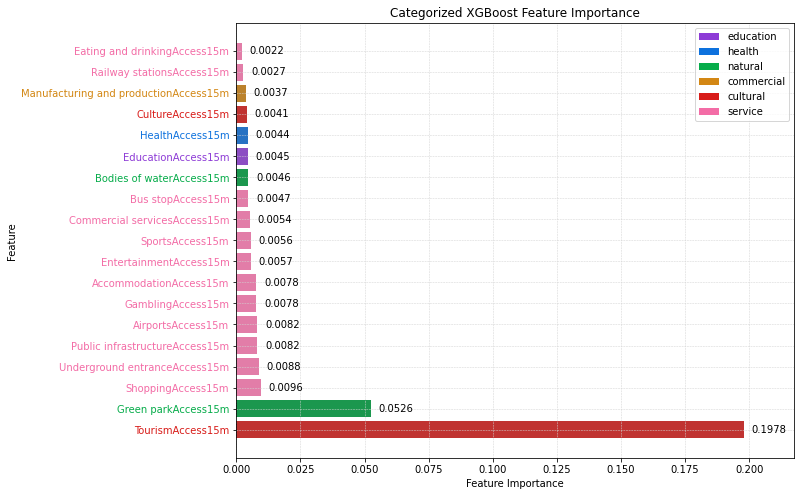

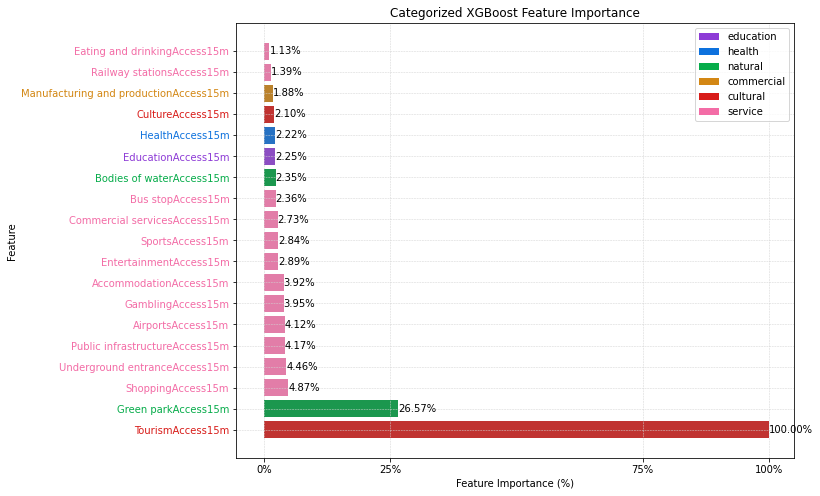

In [16]:


df = pd.read_csv(r"D:\POI data\728_7acc\housing_hasId_reclass3_acc.csv")

df_encoded = pd.get_dummies(df, columns=['property_type', 'borough','tenure'])

X = df_encoded.drop(['price', 'address', 
        'lat', 'lon', 'Price_per_square_meter', 'id'], axis=1)
y = df_encoded['Price_per_square_meter']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# 创建XGBoost回归模型
xgb_model = XGBRegressor(random_state=42)

# 训练模型
xgb_model.fit(X_train, y_train)
testResult(xgb_model)
Categorized_feature_ACCImportance2(xgb_model)
Categorized_feature_relative_ACCImportance2(xgb_model)

reclass3中把bus和underground合并

Train RMSE: 650.8981902703988
Test RMSE: 2988.5150241930655
Train R²: 0.9860683783768461
Test R²: 0.6995299840468006
Train MAPE: 5.83%
Test MAPE: 19.34%


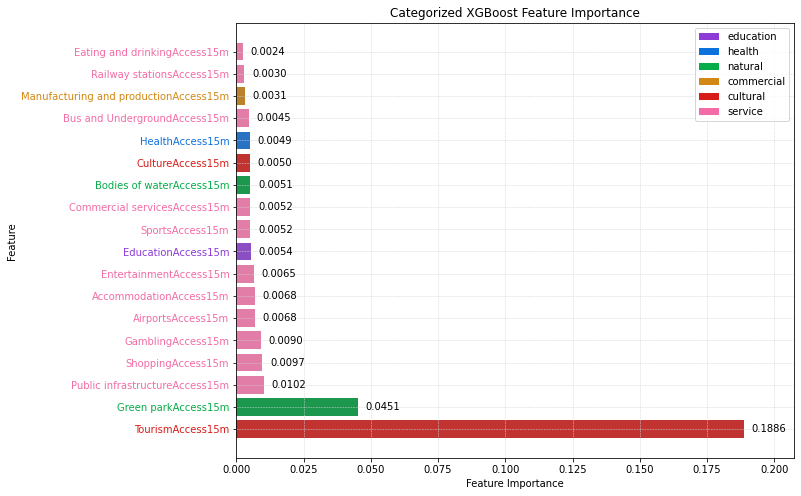

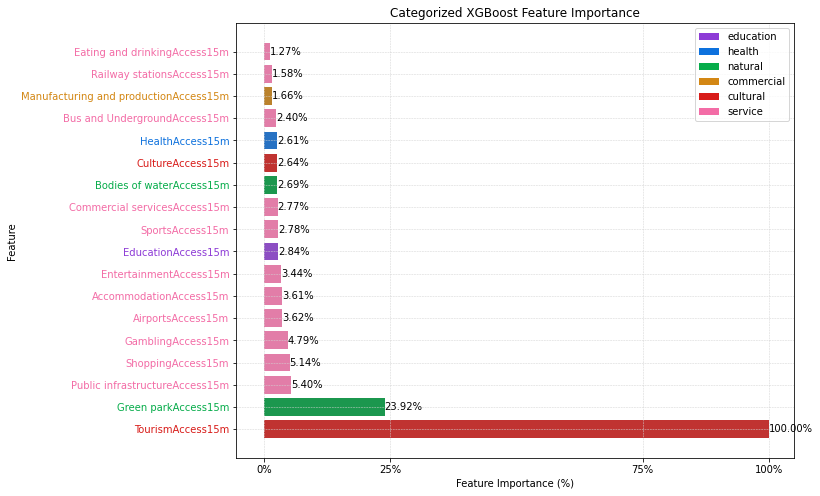

In [17]:


df = pd.read_csv(r"D:\POI data\728_7acc\housing_hasId_reclass3_mergeBusUnderg.csv")

df_encoded = pd.get_dummies(df, columns=['property_type', 'borough','tenure'])

X = df_encoded.drop(['price', 'address', 
        'lat', 'lon', 'Price_per_square_meter', 'id'], axis=1)
y = df_encoded['Price_per_square_meter']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# 创建XGBoost回归模型
xgb_model = XGBRegressor(random_state=42)

# 训练模型
xgb_model.fit(X_train, y_train)
testResult(xgb_model)
Categorized_feature_ACCImportance2(xgb_model)
Categorized_feature_relative_ACCImportance2(xgb_model)

---

最终选择的参数。

在housing_hasId_reclass3_acc.csv中增加房子到伦敦中心Charing Cross的距离(km)

In [18]:

df = pd.read_csv(r"D:\POI data\729_acc\729reclass3_add_distanceToCenter.csv")
df.columns

Index(['price', 'address', 'property_type', 'bedrooms', 'bathrooms',
       'size_square_meters', 'lat', 'lon', 'borough', 'Price_per_square_meter',
       'tenure', 'garden', 'AccommodationAccess15m', 'AirportsAccess15m',
       'Eating and drinkingAccess15m', 'ShoppingAccess15m',
       'Commercial servicesAccess15m', 'EducationAccess15m', 'HealthAccess15m',
       'Manufacturing and productionAccess15m', 'id',
       'Bodies of waterAccess15m', 'Bus stopAccess15m', 'CultureAccess15m',
       'EntertainmentAccess15m', 'GamblingAccess15m', 'Green parkAccess15m',
       'Public infrastructureAccess15m', 'Railway stationsAccess15m',
       'SportsAccess15m', 'TourismAccess15m', 'Underground entranceAccess15m',
       'distance_to_center'],
      dtype='object')

Train RMSE: 666.6451814671486
Test RMSE: 2832.9492265204826
Train R²: 0.9853861370115242
Test R²: 0.7299974691913671
Train MAPE: 5.73%
Test MAPE: 18.13%


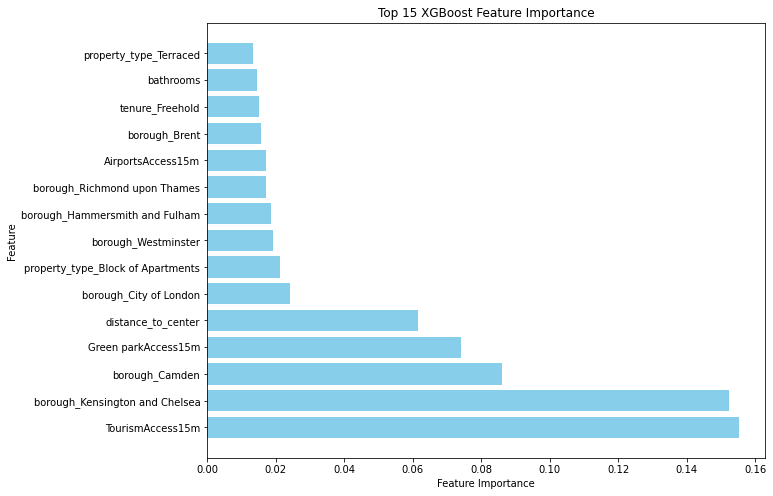

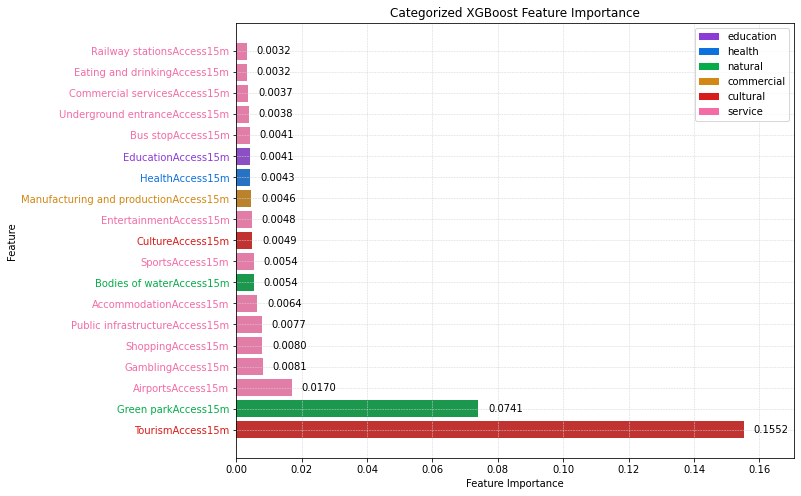

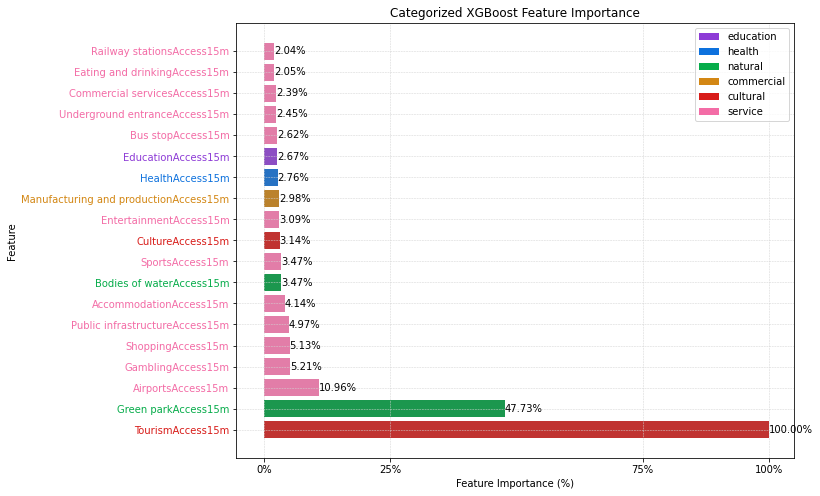

In [19]:

df_encoded = pd.get_dummies(df, columns=['property_type', 'borough','tenure'])

X = df_encoded.drop(['price', 'address', 
        'lat', 'lon', 'Price_per_square_meter', 'id'], axis=1)
y = df_encoded['Price_per_square_meter']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

xgb_model = XGBRegressor(random_state=42)

xgb_model.fit(X_train, y_train)
testResult(xgb_model)

importance_all(xgb_model)
Categorized_feature_ACCImportance2(xgb_model)
Categorized_feature_relative_ACCImportance2(xgb_model)

---

---

grouped by post district, 对每个post district里的点求出质心，求可达性平均值，也就是说现在一个post district就是一条数据。

Train RMSE: 0.037526509528397894
Test RMSE: 2395.1546847726
Train R²: 0.999999999952673
Test R²: 0.5762635043383771
Train MAPE: 0.00%
Test MAPE: 14.31%


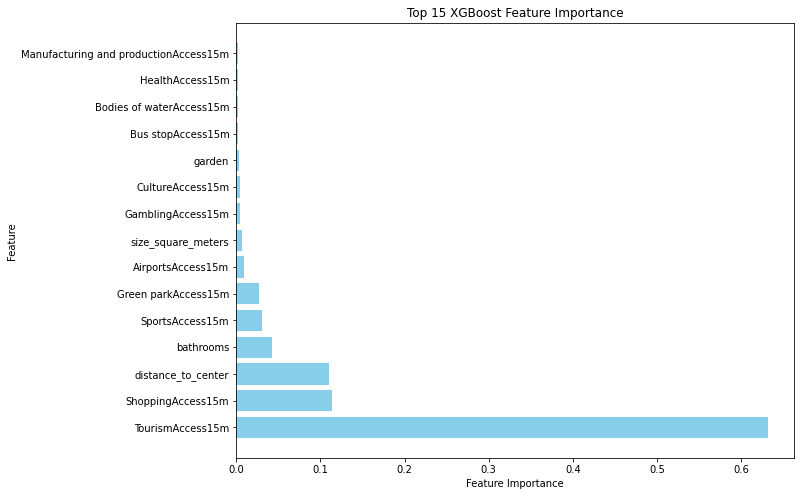

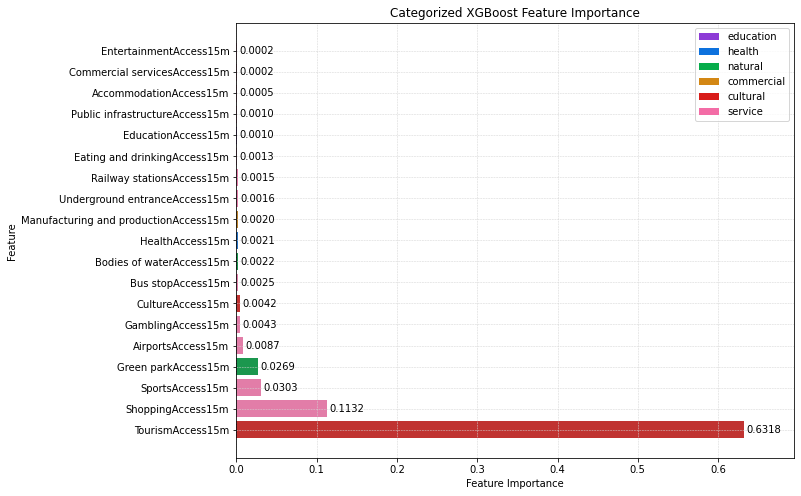

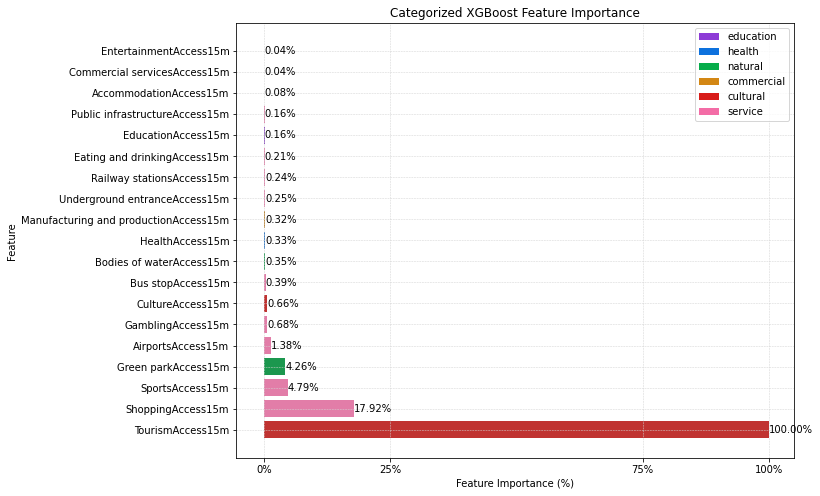

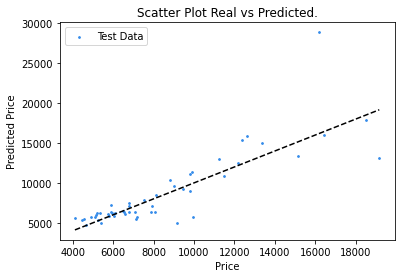

In [20]:

df = pd.read_csv(r"D:\POI data\729_acc\730reclass3_addcenter_average.csv")

df_encoded = df
X = df_encoded.drop(['price', 
       'Price_per_square_meter', 'id', 'center_lon', 'center_lat'], axis=1)
y = df_encoded['Price_per_square_meter']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

xgb_model = XGBRegressor(random_state=42)

xgb_model.fit(X_train, y_train)
testResult(xgb_model)

importance_all(xgb_model)
Categorized_feature_ACCImportance(xgb_model)
Categorized_feature_relative_ACCImportance(xgb_model)
pred_vs_true(xgb_model)


---

Train RMSE: 650.1711576900626
Test RMSE: 2877.7784790671963
Train R²: 0.9860994833521755
Test R²: 0.7213846921699907
Train MAPE: 5.60%
Test MAPE: 18.38%


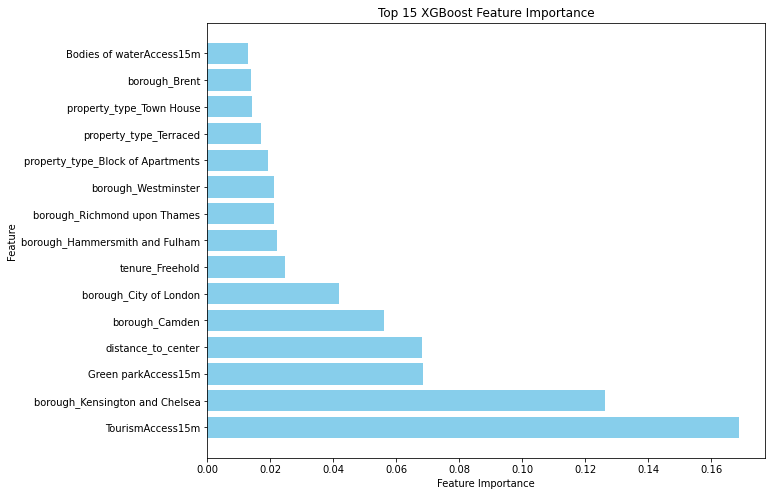

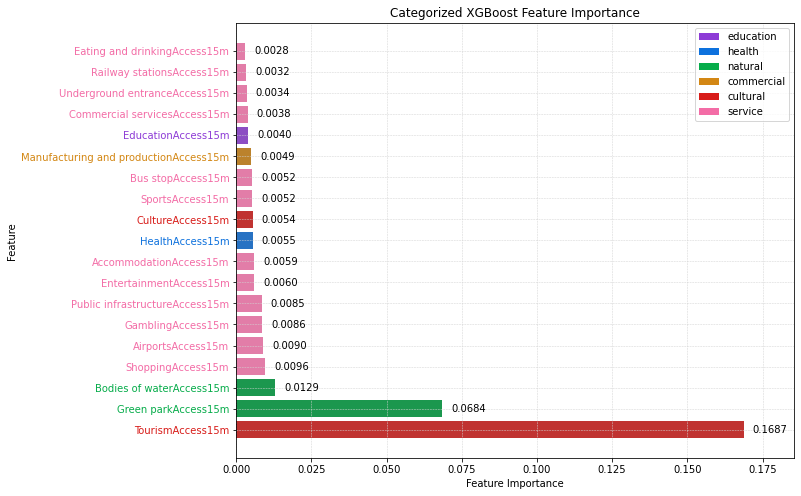

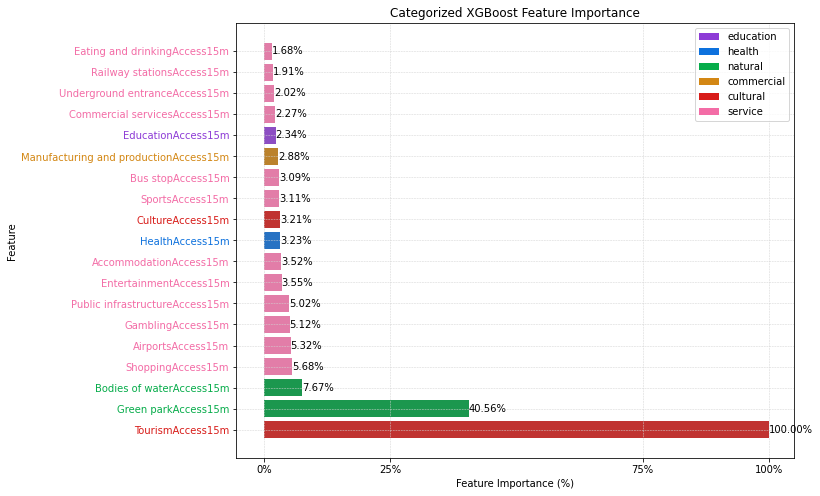

In [23]:
df = pd.read_csv(r"D:\POI data\810_acc\reclass3_add_distanceTounderground.csv")
df_encoded = pd.get_dummies(df, columns=['property_type', 'borough','tenure'])

X = df_encoded.drop(['price', 'address', 
        'lat', 'lon', 'Price_per_square_meter', 'id'], axis=1)
y = df_encoded['Price_per_square_meter']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

xgb_model = XGBRegressor(random_state=42)

xgb_model.fit(X_train, y_train)
testResult(xgb_model)

importance_all(xgb_model)
Categorized_feature_ACCImportance2(xgb_model)
Categorized_feature_relative_ACCImportance2(xgb_model)